# Challenge

## Check for JAVA_HOME

In [1]:
import os
print(os.getenv("JAVA_HOME")) # check for the correct java version (should be 1.8 for using spark)

/Library/Java/JavaVirtualMachines/jdk1.8.0_202.jdk/Contents/Home


## Setup environment

In [3]:
import findspark
findspark.init()
from pyspark import SparkContext
sc = SparkContext.getOrCreate()

import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.getOrCreate() 

## Downloading and preprocessing Chicago's Reported Crime Data

In [4]:
from pyspark.sql.functions import to_timestamp,col
rc = spark.read.csv('Crimes.csv',header=True).withColumn('Date',to_timestamp(col('Date'),'MM/dd/yyyy hh:mm:ss a'))

## Challenge questions

**What is the most frequently reported non-criminal activity?**

In [5]:
rc.columns

['ID',
 'Case Number',
 'Date',
 'Block',
 'IUCR',
 'Primary Type',
 'Description',
 'Location Description',
 'Arrest',
 'Domestic',
 'Beat',
 'District',
 'Ward',
 'Community Area',
 'FBI Code',
 'X Coordinate',
 'Y Coordinate',
 'Year',
 'Updated On',
 'Latitude',
 'Longitude',
 'Location']

In [10]:
rc.filter(col('Primary Type') == "NON-CRIMINAL").groupby("Description").count().orderBy("count", ascending=False).first()

Row(Description='LOST PASSPORT', count=113)

**Using a bar chart, plot which day of the week has the most number of reported crime.**

In [11]:
from pyspark.sql.functions import date_format
test = rc.select('Date', date_format('Date', 'E').alias('Day of Week'))
test.show(10)

+-------------------+-----------+
|               Date|Day of Week|
+-------------------+-----------+
|2013-05-05 19:00:00|        Sun|
|2013-05-02 19:00:00|        Thu|
|2013-03-26 19:00:00|        Tue|
|2013-05-05 17:30:00|        Sun|
|2013-05-05 19:55:00|        Sun|
|2013-05-05 20:20:00|        Sun|
|2013-05-05 19:45:00|        Sun|
|2013-05-05 18:15:00|        Sun|
|2013-05-05 16:30:00|        Sun|
|2013-05-05 20:00:00|        Sun|
+-------------------+-----------+
only showing top 10 rows



In [18]:
result = rc.groupBy(date_format('Date', 'E').alias("Day of week")).count()

In [19]:
result.show()

+-----------+-------+
|Day of week|  count|
+-----------+-------+
|        Sun| 920531|
|       null|    706|
|        Mon| 962126|
|        Thu| 974187|
|        Sat| 974779|
|        Wed| 983426|
|        Tue| 977571|
|        Fri|1026829|
+-----------+-------+



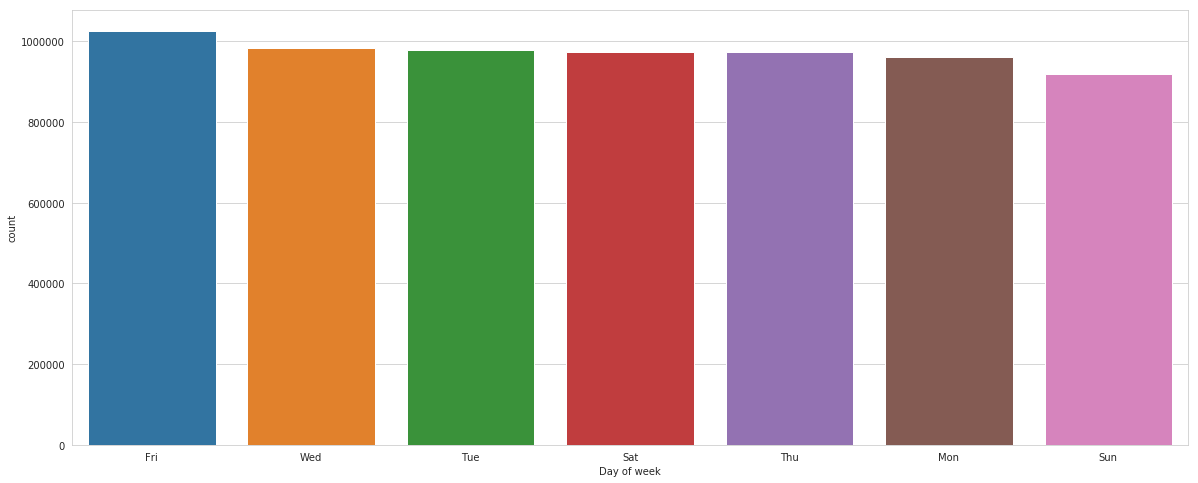

In [35]:
import matplotlib.pyplot as plt
%matplotlib inline 

import seaborn as sns
sns.set_style("whitegrid")

local = result.toPandas()
local = local.sort_values(by="count", ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x="Day of week", y="count", data=local)